In [1]:
%matplotlib notebook
from IPython.display import display
from IPython.html import widgets
from scripts.open_hdf5 import *
from scripts.average_plot import *
from scripts.summary_plot import *

C:\Program Files\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Program Files\Anaconda2\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
file_directory = get_abs_path("data/spectra_example.hdf5")
print file_directory

C:\Users\hanr\GitHub\SGM-Beamline\data/spectra_example.hdf5


In [3]:
scan_num_array = get_all_scan_num_hdf5(file_directory)
print scan_num_array

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
inputText = widgets.Text() 
def generate_array(sender):
	print inputText.value
inputText.on_submit(generate_array)
inputText

5


In [5]:
bad_scan = inputText.value
good_scan = generate_good_scan_array(scan_num_array, bad_scan)

These are the original scan numbers:  [1, 10, 2, 3, 4, 5, 6, 7, 8, 9]

These are bad scan numbers:  [5]

These are all good scan numbers:  [1, 10, 2, 3, 4, 6, 7, 8, 9]


In [6]:
bins = 600
temp_array = prepare_bin_plot_hdf5 (good_scan, file_directory, 690, 750, bins, 60, 80)
mean_energy_array = temp_array[0]
sdd_bin_data = temp_array[1]
scaler_bin_data = temp_array[2]
pfy_bin_data = temp_array[3]

('List of arrays in this file: \n', [u'S1', u'S10', u'S2', u'S3', u'S4', u'S5', u'S6', u'S7', u'S8', u'S9'])
Total good scan numbers: 9
Start creating bins
Number of Bins: 600
Number of Edges: 601
Energy range is:  690 - 750
created bins completed.

The width of a bin is: 0.1
Start assigning data points into bins
Assign data points completed
Start calcualting average of SDD1(MCA1), SDD2(MCA2), SDD3(MCA3) & SDD4(MCA4)...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data

Plotting average XAS.


<IPython.core.display.Javascript object>


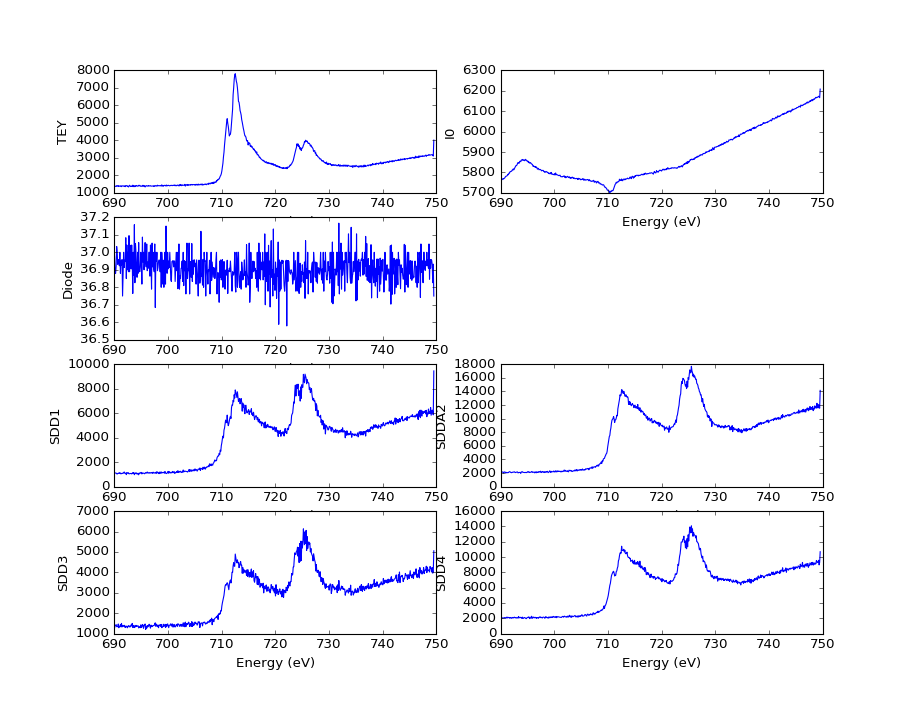

In [7]:
matplotlib.rcParams['figure.figsize'] = (12, 16)
plot_bin_xas_all(mean_energy_array, scaler_bin_data, pfy_bin_data)